In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

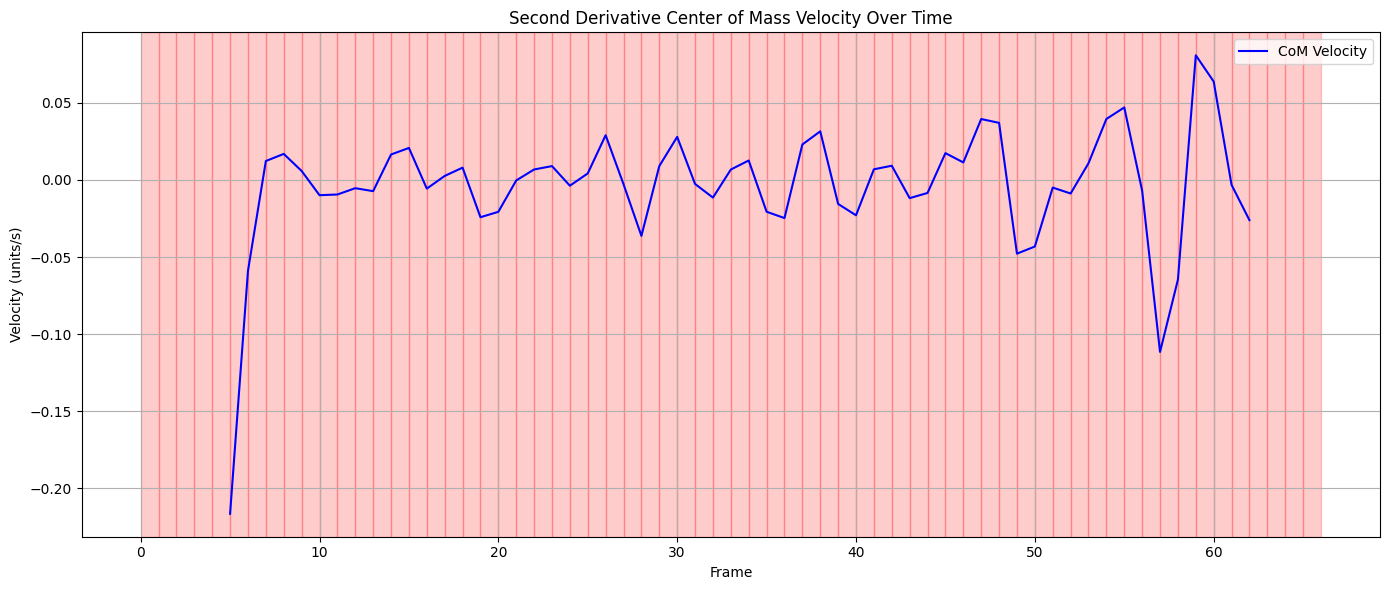

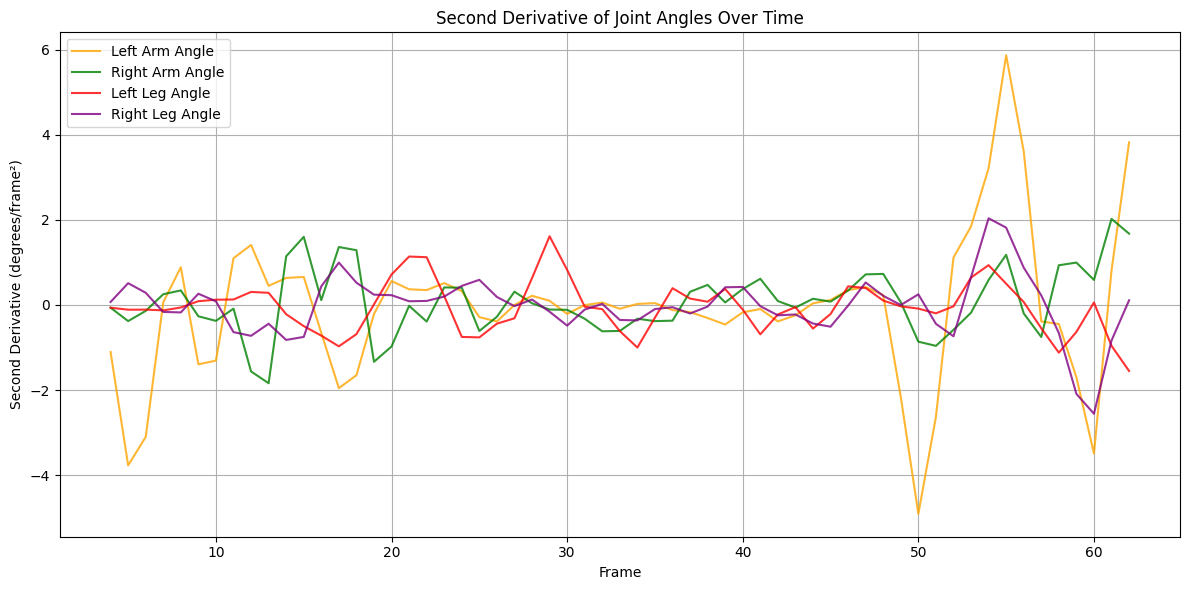

In [93]:
# Read the CSV
name = "joint_angles_2_1_1.mp4.csv"
df = pd.read_csv(name)

# Smooth the CoM velocit

# Smooth joint angles
joint_columns = ['Left Arm Angle', 'Right Arm Angle', 'Left Leg Angle', 'Right Leg Angle']
second_derivative_joint_columns = []

# Compute second derivative of each smoothed joint angle
for joint in joint_columns:
    if joint in df.columns:
        # Smooth first
        smoothed = df[joint].rolling(window=5, center=True).mean()
        
        # First derivative
        first_derivative = np.gradient(smoothed, edge_order=2)
        
        # Second derivative
        second_derivative = np.gradient(first_derivative, edge_order=2)
        
        # Save to dataframe
        second_deriv_col = f'Second_Derivative_{joint}'
        df[second_deriv_col] = second_derivative
        second_derivative_joint_columns.append(second_deriv_col)

# Identify moving regions
moving_mask = df["Moving"] == "Moving"

smoothed_velocity = df["CoM Velocity"]

# Approximate second derivative using np.gradient twice
first_derivative = np.gradient(smoothed_velocity, edge_order=2)
second_derivative = np.gradient(first_derivative, edge_order=2)

df['Acceleration'] = second_derivative
df['Smoothed_Acceleration'] = df['Acceleration'].rolling(window=10, center=True).mean()


# Plot CoM velocity
plt.figure(figsize=(14, 6))
plt.plot(df["Frame"], df["Smoothed_Acceleration"], label="CoM Velocity", color="blue")

# Highlight moving regions
for idx in range(1, len(df)):
    if moving_mask.iloc[idx]:
        plt.axvspan(df["Frame"].iloc[idx-1], df["Frame"].iloc[idx], color="red", alpha=0.2)

plt.title("Second Derivative Center of Mass Velocity Over Time")
plt.xlabel("Frame")
plt.ylabel("Velocity (units/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(name + "_velocity.png")
plt.show()

# Plot second derivatives of joint angles
plt.figure(figsize=(12, 6))
colors = ['orange', 'green', 'red', 'purple']

for joint_col, color in zip(second_derivative_joint_columns, colors):
    plt.plot(df['Frame'], df[joint_col], label=joint_col.replace('Second_Derivative_', ''), color=color, alpha=0.8)

plt.title("Second Derivative of Joint Angles Over Time")
plt.xlabel("Frame")
plt.ylabel("Second Derivative (degrees/frame²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(name + "_second_derivative_angles.png")
plt.show()
